<div class="alert alert-block alert-success">
        
### Комментарий от ревьюера v_1
    
Андрей, отличная работа, но следующие моменты надо исправить
    
1. Расчет доли пользователей, переходящих на следующий шаг воронки
2. Формулировка гипотез
3. Рассуждения об уровне значимости
    
Подробные комментарии по ходу работы
    
Желтые комментарии-рекомендации на твое усмотрение.
    
Если есть вопросы ко мне, можешь оставить их в отдельном комментарии
</div>

<div class="alert alert-block alert-success">
 

### Комментарий от ревьюера v_2
    
Андрей, привет!
    
Отлично, все критичные комментарии отработаны!
    
У тебя получился отличный проект, успеха в дальнейшем обучении!
    
Если есть желание поглубже познакомиться со статистикой, тервером и аб тестами (при этом глубоко не погружаясь в математические дебри) рекомендую посмотреть цикл лекций Глеба Михайлова (возможно он наставник у тебя)
    
https://www.youtube.com/playlist?list=PLQJ7ptkRY-xbHLLI66KdscKp_FJt0FsIi
    
И отличная статья про структуры данных в пандас
    
http://datalytics.ru/all/uglublennoe-izuchenie-pandas-struktury-dannyh/
    

</div>

<font  size=6>Сборный проект 2
    
    
    Анализ поведения пользователей приложения. 
    
    Проведение А/А/В теста 



К анализу предоставлены записи о действиях пользователей мобильного приложения (логи).

Данные содержат записи о типе действия, времени совершения действия, id пользователя.

Пользователи также равномерно распределены на три группы с целью проведения теста на влияние изменения шрифтов в приложениии на пользовательское поведение.

Наша задача - ознакомиться с данными, построить воронку продаж, оценить потери на каждом этапе, затем проанализировать результаты теста и сделать соответствующие выводы.


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично
    
Молодец, что в начале проекте знакомишь с ним, так работа приобретает структуру и лучше воспринимается.
    
А оглавление из плагина TOC можно перенести, установив галочку "Add Notebook Toc Cell"

</div>

### Обзор и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from datetime import datetime, timedelta
from IPython.display import display_html
import math as mth
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)

<div class="alert alert-block alert-success">
    
### Комментарий от ревьюера v_1
Отлично
    
Отлично, библиотеки и параметры в начале тетрадки
</div>

In [3]:
logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [4]:
logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
logs['EventName'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64

In [7]:
#logs.describe()

Проверим на дубликаты и удалим их, при наличии

In [8]:
display(logs.duplicated().sum())

413

In [9]:
logs.drop_duplicates(inplace = True)

<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация

При удалении дубликатов (и вообще при удалении строк из датафрейма) следует обновлять индексы
</div>

In [10]:
logs.columns=['event_name', 'user_id', 'timestamp', 'group_id']

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
      
Здесь все верно, но рекомендую переименовывать колонки явно, методом rename. Так обезопасишь себя от случайной ошибки
    
</div>

In [11]:
logs

,event_name,user_id,timestamp,group_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Добавим необходимые столбцы с данными о дате и о времени

In [12]:
logs['datetime'] = pd.to_datetime(logs['timestamp'], unit='s')
logs

,event_name,user_id,timestamp,group_id,datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58


In [13]:
logs['date'] = logs['datetime'].dt.date
logs

,event_name,user_id,timestamp,group_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [14]:
logs.groupby('user_id')['group_id'].nunique().reset_index().query('group_id > 1')

,user_id,group_id


<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

👍🏻
    
</div>

Нет пользователей, попадающих более, чем в одну группу

In [15]:
logs['group_id'].value_counts()

248    85582
246    80181
247    77950
Name: group_id, dtype: int64

Переименуем группы

In [16]:
def define_group(group):
    if group==246:
        return 'A'
    elif group==247:
        return 'AA'
    elif group==248:
        return 'B'

logs['group_id'] = logs['group_id'].apply(define_group)
logs

,event_name,user_id,timestamp,group_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,A,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,AA,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,A,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,A,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,A,2019-08-07 21:14:58,2019-08-07


In [17]:
logs['group_id'].value_counts()

B     85582
A     80181
AA    77950
Name: group_id, dtype: int64

In [18]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   timestamp   243713 non-null  int64         
 3   group_id    243713 non-null  object        
 4   datetime    243713 non-null  datetime64[ns]
 5   date        243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 13.0+ MB


In [19]:
logs['date'] = logs['date'].astype('datetime64')
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   timestamp   243713 non-null  int64         
 3   group_id    243713 non-null  object        
 4   datetime    243713 non-null  datetime64[ns]
 5   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 13.0+ MB


In [20]:
logs

,event_name,user_id,timestamp,group_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,A,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,AA,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,A,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,A,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,A,2019-08-07 21:14:58,2019-08-07


Данные готовы к анализу

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично

С подготовкой все ОК, но рекомендую завернуть базовые проверки в функцию и использовать ее и в следующих проектах, и в целом при дальнейшей работы с данными
 
</div>

### Анализ данных

#### Анализ пользователей

После удаления дубликатов в логе 243713 событий - это видно из вывода предыдущей таблицы.

Определим общее количесвто пользователей и распеределение пользователей по группам.

In [21]:
logs['user_id'].nunique()

7551

In [22]:
logs.groupby('group_id')['user_id'].nunique()

group_id
A     2489
AA    2520
B     2542
Name: user_id, dtype: int64

Всего 7551 пользователь, которые равномерно распределены по группам

Определим, сколько в среднем событий приходится на одного пользователя. Посчитаем среднее значение и медиану по количеству событий.

In [23]:
display(logs.groupby('user_id')['event_name'].count().mean())
display(logs.groupby('user_id')['event_name'].count().median())

32.27559263673685

20.0

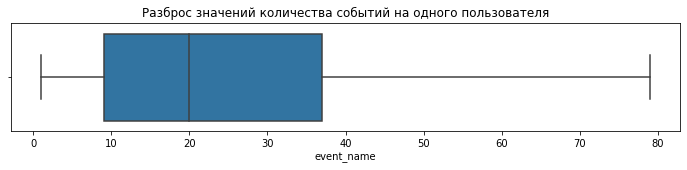

In [24]:
plt.figure(figsize=(12, 2))
sns.boxplot(logs.groupby('user_id')['event_name'].count(),  showfliers=False )
plt.title('Разброс значений количества событий на одного пользователя')
plt.show()

In [25]:
logs.groupby('user_id')['event_name'].count().describe()

count   7551.00
mean      32.28
std       65.15
min        1.00
25%        9.00
50%       20.00
75%       37.00
max     2307.00
Name: event_name, dtype: float64

Мы выяснили, что на среднего пользователя в логах приходится примерно от 10 до 40 записей, хотя есть и значительные выбросы - например на одного из пользователей приходится 2307 событый.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично
    
Отличный шаг, здорово, что используешь визуализации 👍
    
При таком распределении медиана лучше его характеризует
</div>

#### Анализ событый по времени

Определим временные рамки событий, записанных в логах

In [26]:
display(logs['datetime'].min())
display(logs['datetime'].max())

Timestamp('2019-07-25 04:43:36')

Timestamp('2019-08-07 21:15:17')

Логи содержат события за две недели. Построим гистограмму для распределения событий по дня, разложив события по 14 корзинам (по числу дней).

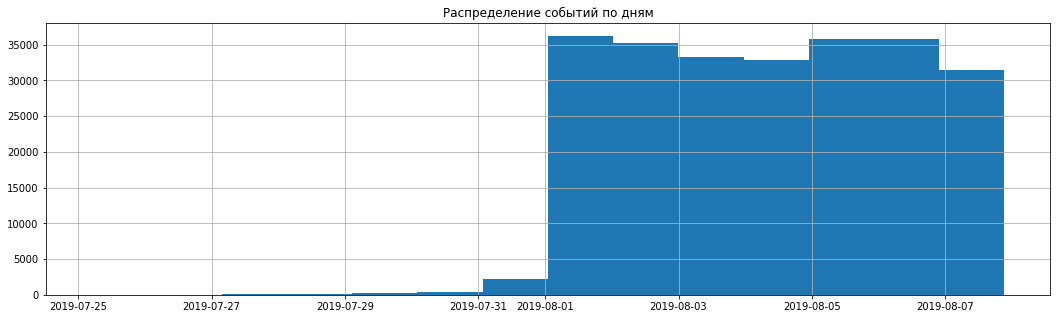

In [27]:
logs['datetime'].hist(bins=14, figsize=(18,5))
plt.title('Распределение событий по дням')
plt.show()

<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация
    
На этой гистаграмме тоже стоит детальнее посмотреть на данные, как ты делаешь ниже
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:
Добавлю гистограмму с разбивкой по часам на весь период. Число корзин ставлю 168х2 = 336.
</div>


<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_2

👍🏻
    
</div>

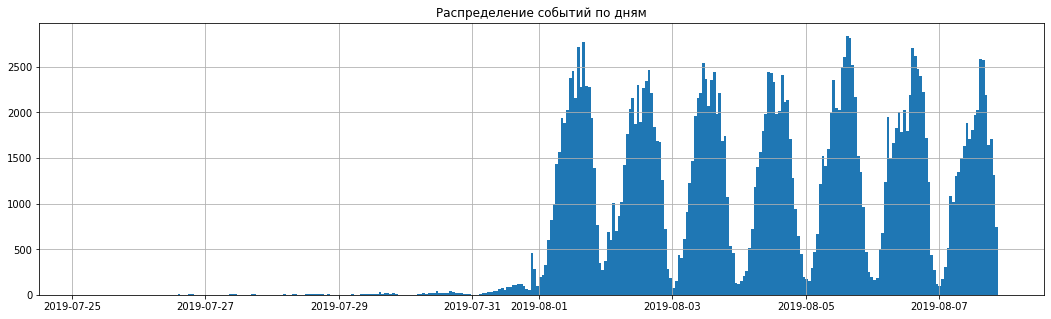

In [28]:
logs['datetime'].hist(bins=336, figsize=(18,5))
plt.title('Распределение событий по дням')
plt.show()

In [29]:
logs = logs.loc[logs['date'] > '2019-07-31']

Посмотрим на распределение оставшегося промежутка. Построим гистограмму из 168 корзин, по количеству часов в 7 сутках.

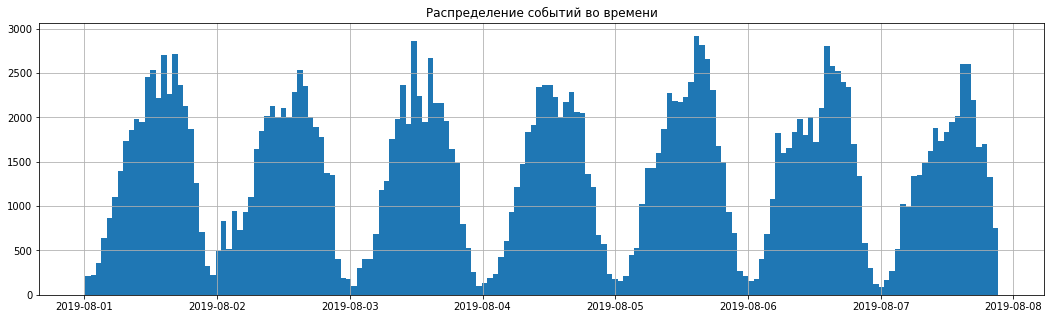

In [30]:
logs['datetime'].hist(bins=168, figsize=(18,5))
plt.title('Распределение событий во времени')
plt.show()

На гистограмме заметны естественные периоды активности пользователей, которые совпадают с соответствующим временем суток.

Проверим отсеянные данные.

In [31]:
#Ставлю вручную количество событий и пользователей из логов, так как уже перезаписал переменную
display ("Количество записей о пользователях после фильтрации", logs['user_id'].nunique(),
         "Событий после фильтрации", logs['event_name'].count())
display("Доля отфильтрованных пользователей", 1 - (logs['user_id'].nunique()/7551),
       "Доля отфильтрованных событий", 1 - (logs['event_name'].count()/243713))

'Количество записей о пользователях после фильтрации'

7534

'Событий после фильтрации'

240887

'Доля отфильтрованных пользователей'

0.0022513574361011646

'Доля отфильтрованных событий'

0.01159560630741896

Отсеяно 17 пользователей, и 2826 событий, что составляет меньше одного процента от всех пользователей и 1.16% от количества событий.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично
    
Здорово, что считаешь потери по пользователям и событиям в относительных показателях
    
А для форматирования удобно использовать f-строки
    
https://www.youtube.com/watch?v=QlkQNWQUCLc&list=PLQAt0m1f9OHvv2wxPGSCWjgy1qER_FvB6&index=14
</div>

Проверим, остались ли после фильтрации пользователи всех групп, как сказано в задании.

In [32]:
logs.groupby('group_id')['user_id'].nunique()

group_id
A     2484
AA    2513
B     2537
Name: user_id, dtype: int64

Все в порядке, как и ожидалось. Удаление 17 пользователей никак не повлияло на распределение пользователей по группам.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

👍🏻
     
</div>

### Анализ воронки событий

#### Количественный анализ событий и пользователей

In [33]:
logs['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

In [34]:
events_count = logs.groupby('event_name')['user_id'].count().sort_values(ascending = False)
events_count

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: user_id, dtype: int64

<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация
    
Не стоит дублировать информацию
</div>

In [35]:
events_users = logs.groupby('event_name').agg({'event_name':'count', 'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
events_users.columns = ['events', 'users']
events_users = events_users.reset_index()
events_users['percentage'] = (events_users['users'] / logs['user_id'].nunique() * 100).round(1)
events_users

,event_name,events,users,percentage
0,MainScreenAppear,117328,7419,98.50
1,OffersScreenAppear,46333,4593,61.00
2,CartScreenAppear,42303,3734,49.60
3,PaymentScreenSuccessful,33918,3539,47.00
4,Tutorial,1005,840,11.10


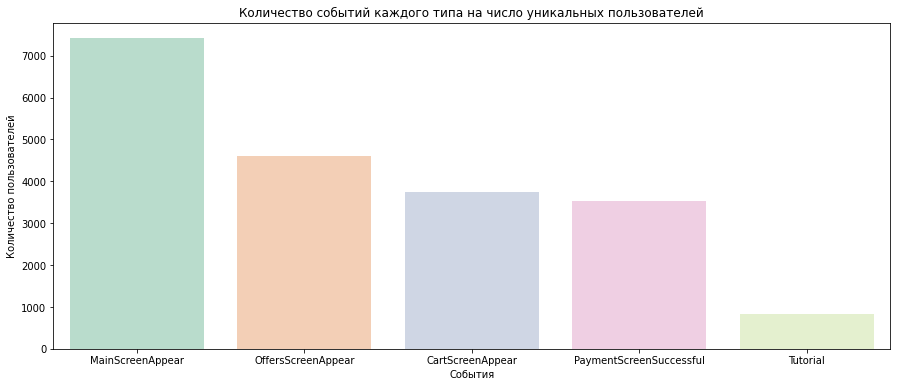

In [36]:
plt.figure(figsize=(15, 6))
sns.barplot(data=events_users, x='event_name', y='users', palette = 'Pastel2')
plt.title('Количество событий каждого типа на число уникальных пользователей')
plt.xlabel('События')
plt.ylabel('Количество пользователей')
plt.show()

Порядок событий линейный по уменьшению количества пользователей, как видно из графика, за исключением события Tutorial

Порядок событий: появление главного экрана (событие А) -> появление экрана с предложениями (событие В) -> открытие корзины (событие С) -> оплата (событие D)

<div class="alert alert-block alert-success">
    
### Комментарий от ревьюера v_1

Верные расчеты и рассуждения 👍
    
</div>

In [37]:
print('Потери пользователей на переходе от события А к событию В:',
      '({:.1%})'.format(1 - (events_users.loc[1, 'users']/events_users.loc[0, 'users'])))
print('Потери пользователей на переходе от события B к событию C:',
      '({:.1%})'.format(1 - (events_users.loc[2, 'users']/events_users.loc[1, 'users'])))
print('Потери пользователей на переходе от события C к событию D:',
      '({:.1%})'.format(1 - (events_users.loc[3, 'users']/events_users.loc[2, 'users'])))

Потери пользователей на переходе от события А к событию В: (38.1%)
Потери пользователей на переходе от события B к событию C: (18.7%)
Потери пользователей на переходе от события C к событию D: (5.2%)


<div class="alert alert-block alert-danger">

    
### Комментарий от ревьюера v_1
Критично

Посчитать не долю переходов, а долю потерь тоже ОК 👍
    
Но расчеты следует оптимизировать. Если шагов будет не 3, а 50?)
    
К тому же это достаточно распространенная аналитическая задача, анализ метрики на основе своих предыдущих значений (например отношение среднего чека по сравнению с предыдущим заказом). Можно сделать с помощью цикла, а можно воспользоваться методом shift
    
</div>

In [38]:
print('Потери пользователей от первого события до оплаты:',
      '({:.1%})'.format(1 - (events_users.loc[3, 'users']/events_users.loc[0, 'users'])))

Потери пользователей от первого события до оплаты: (52.3%)


<div class="alert alert-block alert-info">

### Комментарий студента:
Добавлю столбец с процентом потерь при помощи цикла
</div>

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_2

👍🏻
    
Обращаться к предыдущему значению еще можно с помощью метода shift
    
По ссылке отличное видео про применение оконок в пандасе. Про шифт тоже есть
    
https://www.youtube.com/watch?v=yQ7qHZBY5xI&t=1s&ab_channel=karpov.courses
    
</div>

In [39]:
events_users['loss_percentage'] = 0
for x in range(1, 4):
    events_users.loc[x, 'loss_percentage'] = 1 - (events_users.loc[x, 'users'] /  (events_users.loc[x-1, 'users']))
events_users

,event_name,events,users,percentage,loss_percentage
0,MainScreenAppear,117328,7419,98.50,0.00
1,OffersScreenAppear,46333,4593,61.00,0.38
2,CartScreenAppear,42303,3734,49.60,0.19
3,PaymentScreenSuccessful,33918,3539,47.00,0.05
4,Tutorial,1005,840,11.10,0.00


Как мы видим основные потери пользователей происходят на этапе перехода от события А к событию В. В качестве рекомендации необходимо улучшить показатели на данном этапе. Убедиться, что максимальное количество пользователей перейдут на экран с предложениями, так как потери на следующих этапах минимальны.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Здорово, что в выводах есть рассуждения о природе результатов и рекомендации 👍
    
Но стоит также выдвинуть гипотезы как текущие показатели можно было бы улучшить
    
</div>

### Анализ А/А/В теста

Сколько пользователей в каждой группе?

In [40]:
logs.groupby('group_id')['user_id'].nunique()

group_id
A     2484
AA    2513
B     2537
Name: user_id, dtype: int64

Какое самое популярное событие?

In [41]:
logs['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

MainScreenAppear - самое популярное событие. Теперь посмотим в разбивке по группам. Для этого соберем таблицу.

In [42]:
group_data = logs.groupby('group_id')['user_id'].nunique()
group_data['A+AA'] = group_data['A'] + group_data['AA']


event_test = logs[logs['event_name']!='Tutorial'].pivot_table(
    index='event_name', 
    columns='group_id', 
    values='user_id',
    aggfunc='nunique').sort_values(by='A', ascending=False)

event_test = event_test.reset_index()
event_test['A+AA'] = event_test['A'] + event_test['AA']
event_test['all'] = event_test['A+AA'] + event_test['B']

event_test['percent_A'] = (event_test['A'] / group_data['A'] * 100).round(1)
event_test['percent_AA'] = (event_test['AA'] / group_data['AA'] * 100).round(1)
event_test['percent_B'] = (event_test['B'] / group_data['B'] * 100).round(1)
event_test['percent_A+AA'] = ((event_test['A'] + event_test['AA']) / \
                                  (group_data['A'] + group_data['AA']) * 100).round(1)

event_test

group_id,event_name,A,AA,B,A+AA,all,percent_A,percent_AA,percent_B,percent_A+AA
0,MainScreenAppear,2450,2476,2493,4926,7419,98.60,98.50,98.30,98.60
1,OffersScreenAppear,1542,1520,1531,3062,4593,62.10,60.50,60.30,61.30
2,CartScreenAppear,1266,1238,1230,2504,3734,51.00,49.30,48.50,50.10
3,PaymentScreenSuccessful,1200,1158,1181,2358,3539,48.30,46.10,46.60,47.20


<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Данные подготовлены 👍
    
Но чтобы не считать количество пользователей в группе в отдельной таблице, при расчете сводной можно добавить параметр `Margins=True`
    
Рекомендую почитать про сводные таблицы тут, и вообще ресурс отличный, кидай его в закладки
    
http://dfedorov.spb.ru/pandas/%D0%A1%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%20pandas.html
    
</div>

Доля пользователей по группам для самого популярного события MainScreenAppear:

Группа А - 98.6 %

Группа АА - 98.5 %

Группа В - 98.3%

Зададим функцию для проведения статистического теста. В качестве порога статистической значимости будем использовать 0.01, так как контрольные группы должны быть предельно похожи

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера v_1
Рекомендация

Почему для АА теста выбираешь меньший уровень значимости? Ведь различий наоборот не должно быть между контрольными группами
    
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:

Да, действительно, надо было бы поставить 0.1, а не 0.01, потому что, чем выше значение p-value, тем меньше разницы между группами.

Соответственно, нужно брать большее значение, а не меньшее. Однако, даже при уровне значимости 0.1 результат будет такой же.
</div>

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_2

Обычно для АА теста берут такую же альфу, как и для АБ
    
</div>

In [43]:
def z_test(group1, group2, alpha):
    for i in event_test.index:
        p1 = event_test[group1][i] / group_data[group1]
        
        p2 = event_test[group2][i] / group_data[group2]
        
        p_combined = ((event_test[group1][i] + event_test[group2][i]) / 
                      (group_data[group1] + group_data[group2]))
        
        difference = p1 - p2
        
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/group_data[group1] + 1/group_data[group2]))
        
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_test['event_name'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера v_1
Рекомендация

Функция дает правильный результат, в этом проекте мы действительно проверяем стат значимость по всем событиям воронки, так будет не всегда. И было бы здорово написать универсальную функцию, которую можно использовать и в других проектах.
    
И аргументами функции следует передавать значения, по которым проводится тест (то есть в теле функции не вести никаких работ с датафреймом) Тогда функция будет универсальной и ее можно будет применять к любым данным
    
</div>

<div class="alert alert-block alert-danger">
    
### Комментарий от ревьюера v_1
Критично

Перед проведением тестов следует сформулировать нулевую и альтернативную гипотезы, указав в них в чем именно ищешь различия. Можно сформулировать один раз для всех тестов


</div>

<div class="alert alert-block alert-info">

### Комментарий студента:

Добавил формулировки гипотез
</div>

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_2

👍🏻
    
</div>

Нулевая гипотеза - доли уникальных посетителей на данном этапе воронки одинаковы

Альтернативная гипотеза - доли уникальных посетителей на данном этапе воронки различны

In [44]:
z_test("A", "AA", 0.01)

MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Контрольные группы прошли тест успешно. Разницы между группами не обнаружено.

#### A/B тест

Проведем тест А/В тест, выбрав стандартный порог статистической значимости в 0.05

In [45]:
z_test("A", "B", 0.05)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [46]:
z_test("AA", "B", 0.05)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [47]:
z_test("A+AA", "B", 0.05)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



<div class="alert alert-block alert-success">
    
### Комментарий от ревьюера v_1

Все расчеты верны, различия между группами не обнаружены 👍

</div>

<div class="alert alert-block alert-danger">
    
### Комментарий от ревьюера v_1
Критично
    
 На этом шаге очень важно порассуждать об оптимальном для тестов уровне статистической значимости, учитывая тот факт, что у нас идет множественная проверка гипотез, а значит увеличивается риск ложноположительного результата, найти различия там, где их на самом деле нет.
    
Вот здесь отлично разбирается этот момент и в целом рекомендую данный курс, мне он многое дал в свое время
    
https://stepik.org/lesson/8085/step/3?unit=1364
    
 
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:

Я попробую порассуждать об уровнях статистической значимости, надеюсь, этого будет достаточно.
    
Кстати, большое спасибо за ссылку, действительно очень классные видеоуроки! Просмотрю их все как-нибудь.
    
С увеличением числа проверок действительно растет шанс случайно получить ложноположительный результат.
Как наглядно показывает лектор в видео, если мы задаем большое количество проверок, то шанс того, что одна из этих проверок случайным образом даст неверный результат, возрастает.

В таком случае логично использовать поправку Бонферрони (разделить принятое значение статистической значимости на количество сравнений (в нашем случае - 0.05 мы должны поделить на 3, так как у нас три сравнения - А-В, АА-В, А+АА - В).
    
В таком случае значение p-value уменьшится, соответственно, доказательств, чтобы отвергнуть нулевую теорию нужно будет собрать больше.
    
Однако, что мы видим в нашем случае? 

Во-первых, в нашем случае мы не задаем условие того, что провал одной из проверок по одному этапу воронки означает провал всего теста. 
    
Во-вторых, даже с учетом того, что я не использовал поправку Бонферрони, ни одна из выборок ни в одном сравнении не достигла значений ниже 0.05. Соответственно, если поправка будет применена и мы поделим 0.05 на количество тестов, результат будет тот же.
    
Мне изначально следовало бы применить функцию, которая бы учитывала поправку Бонферрони в теле функции. Я видел такие функции, когда готовил проект, но я сделал выбор в пользу более простой. Чего необходимо будет избегать в будущем.

</div>

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_2

Все верно, в нашем случае поправки не повлияют на результат. 
    
Но при каждом новом сравнении у нас увеличивается вероятность ложнопозитивного результата. Если использовать поправку Бонферрони, делить надо на количество сравнений, т.е. на 16
    
</div>

### Вывод

На этапе предобработки из данных были удалены 413 дубликатов, а также все записи, сделанные до 1 августа.

Выделена последовательность действий пользователя и определена воронка продаж, оценены потери пользователей на каждом этапе.
Наибольшие потери пользователей приложения происходят на переходе от 1 к 2 событию - то есть на этапе перехода с основного экрана на экран с предложениями. Необходимо поработать над увеличением конверсии на данном этапе.

Был проведен анализ А/А/В теста по факту изменения шрифтов в приложении.
Нулевой гипотезой было предположение, что выбранный дизайнерами шрифт не влияет на взаимодействие пользователей с приложением.
В качестве порога статистической значимости для сравнения контрольной и основной группы выбрано значение p-value в 0.01, тогда как для сравнения основной и тестируемой группы - выбрано значение в 0.05.
Так или иначе, сравнение ни одной из выборок не дало значение p-value ниже 0.05, минимальное значение - 0.0784.
Отвергнуть нулевую гипотезу не удалось, по-видимому, шрифт действительно не влияет на поведение пользователей.

Решение по результатам теста - остановить тест, признав остуствие различий между основной и тестируемой группами пользователей.


<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Отличный вывод 👍🏻
    
Но он немного теряется в потоке текста, стоит структурировать свои мысли:
    
1.
    
2.
    
3.
    
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:

Переформатировал и дополнил вывод
    
</div>

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_2

👍🏻
    
</div>

**ВЫВОД**

1. **Предобработка данных**

На этапе предобработки из данных были удалены 413 дубликатов, а также все записи, сделанные до 1 августа.

2. **Воронка продаж**

Выделена последовательность действий пользователя и определена воронка продаж, оценены потери пользователей на каждом этапе.
Наибольшие потери пользователей приложения происходят на переходе от 1 к 2 событию - то есть на этапе перехода с основного экрана на экран с предложениями. Необходимо поработать над увеличением конверсии на данном этапе.

**В качестве предложений можно внести - принудительно показывать экран с предложениям спустя N секунд использования приложения, или любой другой способ, который упростит переход от основного экрана приложения к экрану с предложенииями**

**Также имеет смысл провести проверку на наличие техническим проблем на этапе перехода на страницу с предложениями для разных типов устройств**

3. **Тест**

Нулевой гипотезой было предположение, что выбранный дизайнерами шрифт не влияет на взаимодействие пользователей с приложением.
В качестве порога статистической значимости для сравнения контрольной и основной группы выбрано значение p-value в 0.01, тогда как для сравнения основной и тестируемой группы - выбрано значение в 0.05.

Сравнение ни одной из выборок не дало значение p-value ниже 0.05, минимальное значение - 0.0784.
Отвергнуть нулевую гипотезу не удалось, по-видимому, шрифт действительно не влияет на поведение пользователей.

4. **Решение**

Остановить тест, признав остуствие различий между основной и тестируемой группами пользователей.

